<a href="https://colab.research.google.com/github/Vangzbill/PCVK_Ganjil_2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi**

---

Nama      : Sabilla Luthfi Rahmadhan

No Absen  : 19

Kelas     : TI-3G
***

# TUGAS PRAKTIKUM

 Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

**Load Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
plat = '/content/drive/MyDrive/PCVK/Images/plat nomer.jpg'
lily = 'content/drive/MyDrive/PCVK/Images/lily.jpg'
lena = '/content/drive/MyDrive/PCVK/Images/lena.jpg'
lena_lc = '/content/drive/MyDrive/PCVK/Images/lena_lc.jpg'
kitten = '/content/drive/MyDrive/PCVK/Images/kitten01.jpg'
galaxy = '/content/drive/MyDrive/PCVK/Images/galaxy.jpg'
female = '/content/drive/MyDrive/PCVK/Images/female.tiff'

**Import Library**

In [10]:
# Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

**Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV**

In [12]:
# fungsi dilasi
def dilate(image):
    # Define the structuring element
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)

    # Define the output image
    output = np.zeros_like(image)

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Loop over each pixel in the image
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the neighborhood of the pixel
            neighborhood = image[i-1:i+2, j-1:j+2]

            # Perform the dilation operation
            output[i,j] = cv2.bitwise_or(neighborhood, kernel).max()

    return output

    print(kernel)

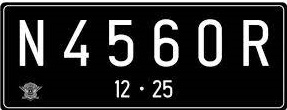

In [13]:
# Load image
plat = cv2.imread(plat, 0)
cv2_imshow(plat)

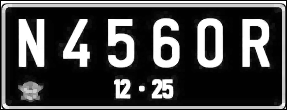

In [14]:
# proses dilasi
dilated_plat = dilate(plat)
cv2_imshow(dilated_plat)

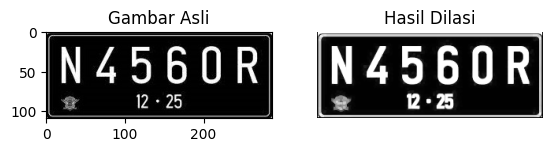

In [15]:
# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(dilated_plat, cmap="gray")
axs[1].set_title('Hasil Dilasi')
plt.axis('off')

plt.show()

**Implementasi operasi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV**

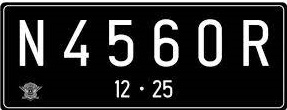

In [16]:
# Load image

cv2_imshow(plat)

In [17]:
# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
print(kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


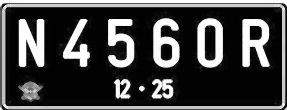

In [18]:
# proses dilasi dengan library openCV
dilated_plat_library = cv2.dilate(plat, kernel, iterations=1) #iteration satu kali
cv2_imshow(dilated_plat_library)

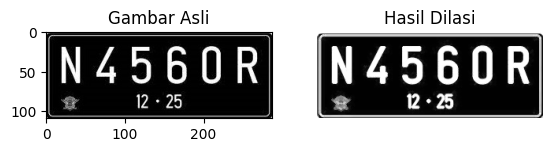

In [19]:
# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(dilated_plat_library, cmap="gray")
axs[1].set_title('Hasil Dilasi')
plt.axis('off')

plt.show()

**Fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV**

In [20]:
# fungsi erosi
def erode(image):
    # Define the structuring element
    kernel = np.ones((5, 5), dtype=np.uint8)

    # Define the output image
    output = np.zeros_like(image)

    # Get the height and width of the image
    height, width = image.shape[:2]

    # Loop over each pixel in the image
    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Get the neighborhood of the pixel
            neighborhood = image[i-2:i+3, j-2:j+3]

            # Perform the erosion operation
            output[i,j] = cv2.bitwise_and(neighborhood, kernel).min()

    return output

print(kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


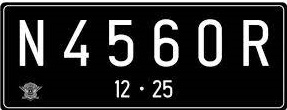

In [21]:
# Load image
cv2_imshow(plat)

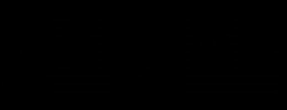

In [22]:
# proses erosi
eroded_plat = erode(plat)

cv2_imshow(eroded_plat)

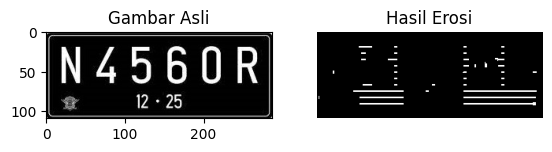

In [23]:
# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(eroded_plat, cmap="gray")
axs[1].set_title('Hasil Erosi')
plt.axis('off')

plt.show()

**Implementasi operasi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV**

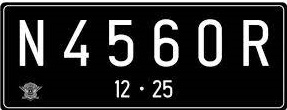

In [24]:
# Load image
cv2_imshow(plat)

In [25]:
# Define the structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
print(kernel)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


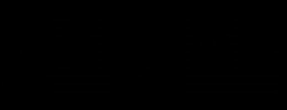

In [26]:
# proses erosi dengan library
eroded_image_library = cv2.erode(plat, kernel, iterations=1)

cv2_imshow(eroded_plat)

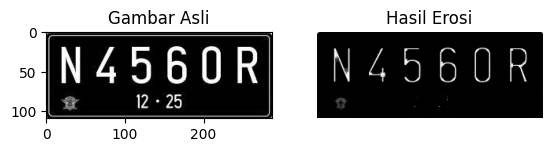

In [27]:
# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(eroded_image_library, cmap="gray")
axs[1].set_title('Hasil Erosi')
plt.axis('off')

plt.show()

**Program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV**

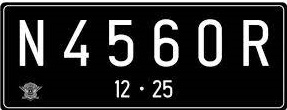

In [28]:
# Load Image
cv2_imshow(plat)

In [29]:
# Define the kernel
kernel = np.ones((3,3),np.uint8)

# Perform thresholding to get binary image
ret, thresh = cv2.threshold(plat, 127, 255, cv2.THRESH_BINARY)

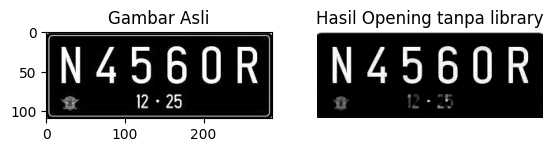

In [30]:
# Perform opening without morphologyEx
# erosi dulu baru dilasi
opening_without_morphologyEx = cv2.erode(plat,kernel,iterations = 1)  #erosi
opening_without_morphologyEx = cv2.dilate(opening_without_morphologyEx,kernel,iterations = 1) #dilasi

# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(opening_without_morphologyEx, cmap="gray")
axs[1].set_title('Hasil Opening tanpa library')
plt.axis('off')

plt.show()

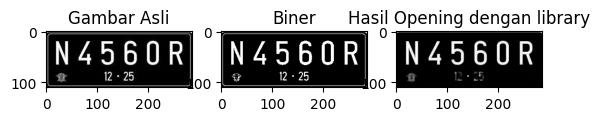

In [31]:
# Perform opening with morphologyEx library
opening_with_morphologyEx = cv2.morphologyEx(plat, cv2.MORPH_OPEN, kernel)

# hasil
fig, axs = plt.subplots(1, 3)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
# plt.axis('off')

axs[1].imshow(thresh, cmap="gray")
axs[1].set_title('Biner')
# plt.axis('off')

axs[2].imshow(opening_with_morphologyEx, cmap="gray")
axs[2].set_title('Hasil Opening dengan library')
# plt.axis('off')

plt.show()

**Fungsi program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV**

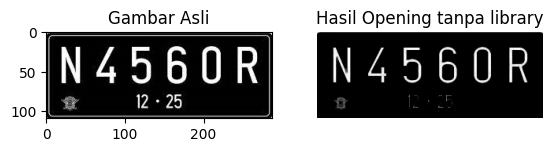

In [32]:
# Perform opening without morphologyEx

opening_without_morphologyEx = cv2.dilate(opening_without_morphologyEx,kernel,iterations = 1) #dilasi
opening_without_morphologyEx = cv2.erode(plat,kernel,iterations = 1)  #erosi

# hasil
fig, axs = plt.subplots(1, 2)
axs[0].imshow(plat, cmap="gray")
axs[0].set_title('Gambar Asli')
plt.axis('off')

axs[1].imshow(opening_without_morphologyEx, cmap="gray")
axs[1].set_title('Hasil Opening tanpa library')
plt.axis('off')

plt.show()

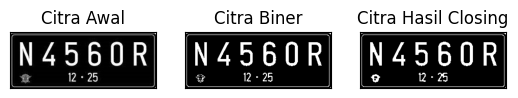

In [33]:
ret, thresh = cv2.threshold(plat, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3),np.uint8)
closs = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel)

plt.subplot(131),plt.imshow(plat,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(closs,cmap = 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])

plt.show()

**Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5**

SED=Cross3


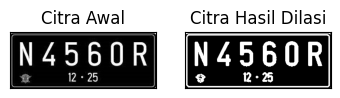

SED = Cross 5


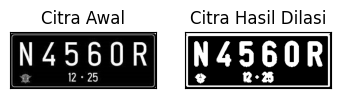

In [36]:
# dilasi cross sed
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)
  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1,j-constant1:j+constant1+1]
      product=temp*SED
      imgD[i,j]=np.max(product)
  return imgD

print('SED=Cross3')
img_d=cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret,thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD=dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap='gray')
plt.title('Citra Awal'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap='gray')
plt.title('Citra Hasil Dilasi'),plt.xticks([]),plt.yticks([])
plt.show()

def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  # SED= np.ones((w,w), dtype=np.uint8)
  SED = np.array([[0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0],
                [1, 1, 1, 1, 1],
                [0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0]], dtype = np.uint8)
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD
print('SED = Cross 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg', 0)
ret, thresh = cv2.threshold(img_d, 127, 225, cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5**

SED = Circle 3


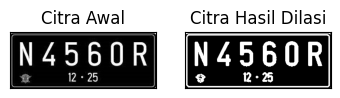

SED = Circle 5


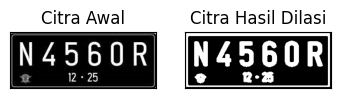

In [37]:
def dilasi_citra(F,w):
  #size image
  p,q= F.shape

  imgD= np.zeros((p,q), dtype=np.uint8)

  #Generate structure element dilasi (SED)
  SED= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(w,w))
  constant1= (w-1)//2

  #Proses Dilasi
  for i in range(constant1, p-constant1):
    for j in range(constant1,q-constant1):
      temp= F[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
      product= temp*SED
      imgD[i,j]= np.max(product)
  return imgD

print('SED = Circle 3')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=3
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SED = Circle 5')
img_d= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0)
ret, thresh = cv2.threshold(img_d, 127, 225,cv2.THRESH_BINARY)
w=5
imgD = dilasi_citra(thresh,w)

plt.subplot(131),plt.imshow(img_d,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgD,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]),
plt.yticks([])
plt.show()

**Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7**

SE = Rectangle 3x5


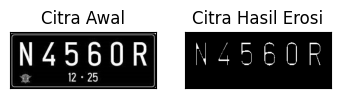

SE = Rectangle 5x7


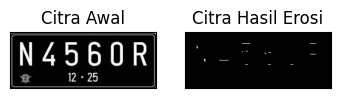

In [38]:
def erosi_citra(F,p,l):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_RECT,(p,l)) #SE persegi panjang
  constant1= (l-1)//2
  constant2= (p-1)//2
  # print(SE)
  imgE= np.zeros((m,n), dtype=np.uint8)

  #Proses Erosi
  for i in range(constant1, m-constant1):
    for j in range(constant2,n-constant2):
      temp= F[i-constant1:i+constant1+1, j-constant2:j+constant2+1]
      product= temp*SE
      imgE[i,j]= np.min(product)

  return imgE
print('SE = Rectangle 3x5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=5
l=3
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

print('SE = Rectangle 5x7')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225, cv2.THRESH_BINARY)
p=7
l=5
imgE = erosi_citra(thresh1,p,l)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]), plt.yticks([])
plt.show()

**Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5**

SE = Line Vertikal 3


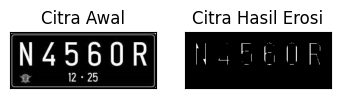

SE = Line Vertikal 5


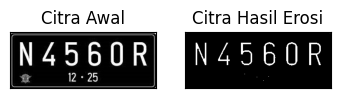

In [39]:
#Erosi Line Vertikal SE

def erosi_citra(F,k):
  #size image
  m,n= F.shape

  #Generate structure element erosi (SE)
  SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,k)) #SE line vertikal
  constant= (k-1)//2

  imgE= np.zeros((m,n), dtype=np.uint8)
  #Proses Erosi
  for i in range(constant, m-constant):
    for j in range(constant,n-constant):
      temp= F[i-constant:i+constant+1, j-constant:j+constant+1]
      product=temp*SE
      imgE[i,j]=np.min(product)
  return imgE

print('SE = Line Vertikal 3')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,cv2.THRESH_BINARY)
k=5
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

print('SE = Line Vertikal 5')
img_e= cv2.imread('/content/drive/MyDrive/PCVK/Images/plat nomer.jpg',0) #
ret1, thresh1 = cv2.threshold(img_e, 127, 225,
cv2.THRESH_BINARY)
k=3
imgE = erosi_citra(thresh1,k)

plt.subplot(131),plt.imshow(img_e,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgE,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.xticks([]),
plt.yticks([])
plt.show()

**TopHat**

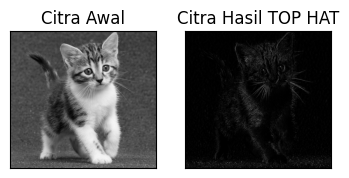

In [41]:
# Getting the kernel to be used in Top-Hat
filterSize =(4, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat_img,cmap = 'gray')
plt.title('Citra Hasil TOP HAT'), plt.xticks([]), plt.yticks([])
plt.show()

**BlackHat**

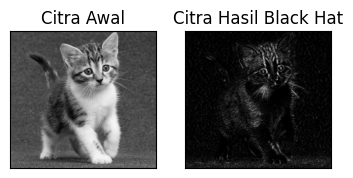

In [43]:
filterSize =(3, 3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)

# Reading the image named 'input.jpg'
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/kitten01.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applying the Black-Hat operation
#tophat_img = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
Kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, Kernel)
#cv2.imshow("original", input_image)
#cv2.imshow("tophat", tophat_img)
#cv2.waitKey(5000)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat,cmap = 'gray')
plt.title('Citra Hasil Black Hat'), plt.xticks([]), plt.yticks([])
plt.show()

**Skeleton**

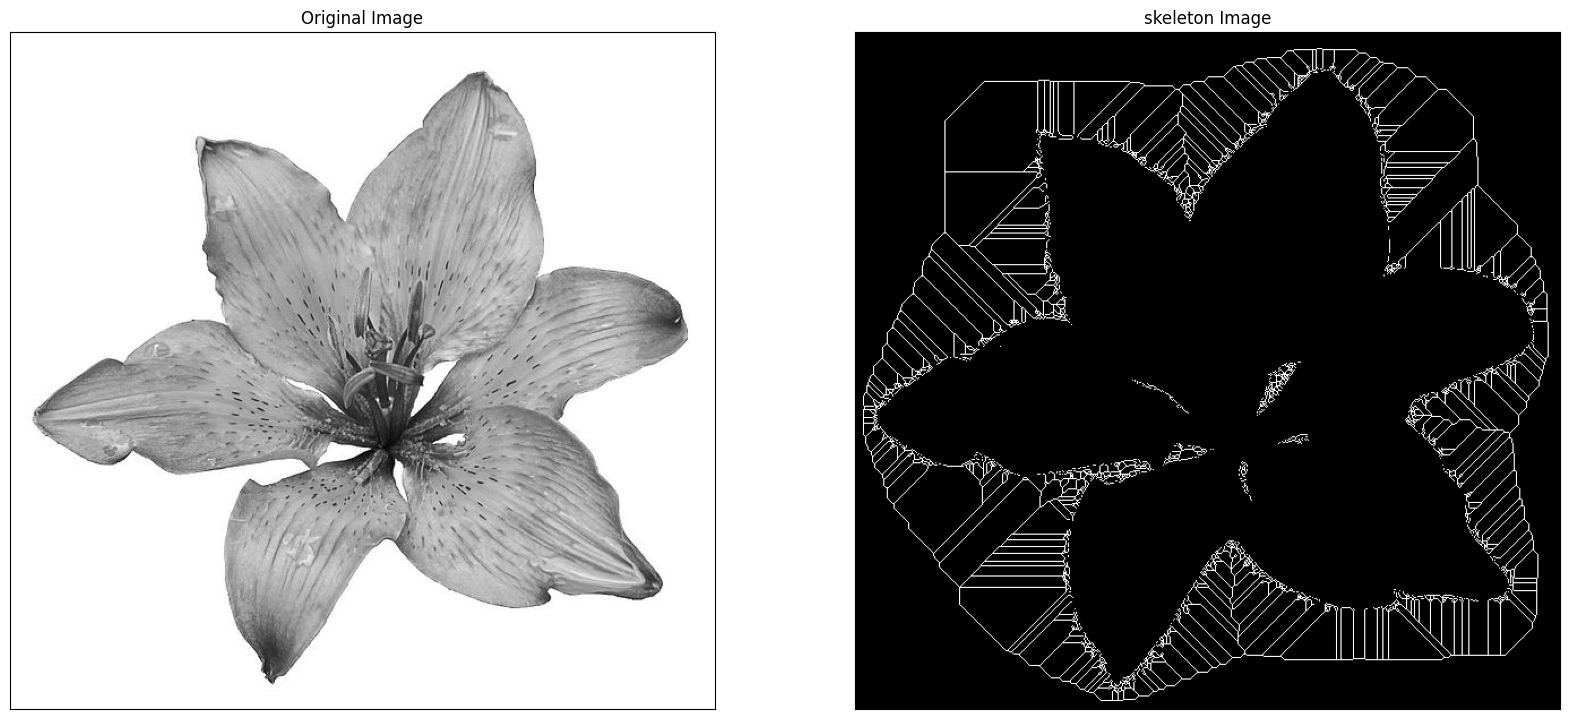

In [45]:
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()
binary_cp[binary_cp == True] = 1
binary_cp[binary_cp == False] = 0

# skeletonize image
skeleton = skeletonize(binary_cp)

# print images
plt.figure(figsize=(20,20))

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(skeleton,cmap = 'gray')
plt.title('skeleton Image'), plt.xticks([]), plt.yticks([])

plt.savefig("binary and bin_skeleton.png")
plt.show()

**Skeleton Inverse**

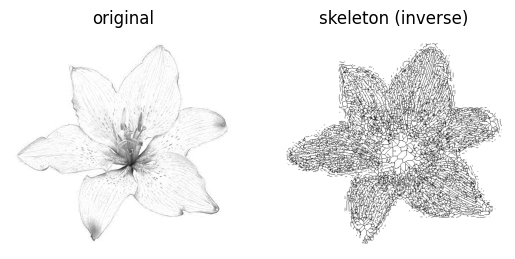

In [46]:
from skimage import io
from matplotlib import pyplot as plt
from skimage import filters

from skimage.morphology import skeletonize

# read image
img = io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')[...,0]

# Note: we want the black bits to be True, so use <
binary = img < filters.threshold_triangle(img)

# skeletonize image
skeleton = skeletonize(binary)

# print images
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original')
ax[0].set_axis_off()

# note the reversed colormap, gray_r
ax[1].imshow(skeleton, cmap='gray_r')
ax[1].set_title('skeleton (inverse)')
ax[1].set_axis_off()

plt.show()

**Thickening**

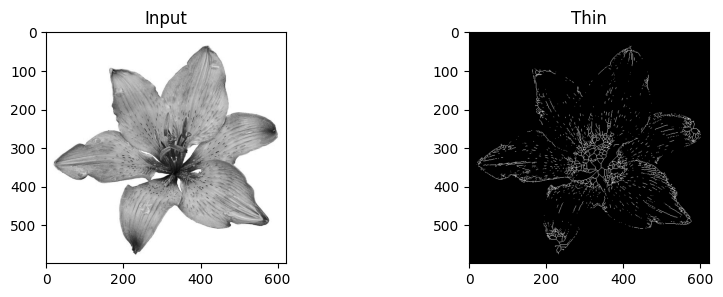

In [48]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PCVK/Images/lily.jpg')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')

plt.savefig('/tmp/char_out.png')
plt.show()